In [1]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
training_set = pd.read_csv('data/GOOG.csv')
training_set = training_set.iloc[:,5:6].values



In [2]:
training_set.shape

(2497, 1)

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

# Getting the inputs and the ouputs
X_train = training_set[0:2496]
y_train = training_set[1:2497]

# Reshaping
X_train = np.reshape(X_train, (2496, 1, 1))

In [4]:
X_train.shape

(2496, 1, 1)

In [5]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Using TensorFlow backend.


In [6]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
2496/2496 [==============================] - 0s - loss: 0.4663     
Epoch 2/200
2496/2496 [==============================] - 0s - loss: 0.2872     
Epoch 3/200
2496/2496 [==============================] - 0s - loss: 0.1787     
Epoch 4/200
2496/2496 [==============================] - 0s - loss: 0.1150     
Epoch 5/200
2496/2496 [==============================] - 0s - loss: 0.0801     
Epoch 6/200
2496/2496 [==============================] - 0s - loss: 0.0630     
Epoch 7/200
2496/2496 [==============================] - 0s - loss: 0.0555     
Epoch 8/200
2496/2496 [==============================] - 0s - loss: 0.0523     
Epoch 9/200
2496/2496 [==============================] - 0s - loss: 0.0508     
Epoch 10/200
2496/2496 [==============================] - 0s - loss: 0.0497     
Epoch 11/200
2496/2496 [==============================] - 0s - loss: 0.0488     
Epoch 12/200
2496/2496 [==============================] - 0s - loss: 0.0477     
Epoch 13/200
2496/2496 [=============

2496/2496 [==============================] - 0s - loss: 6.1346e-05     
Epoch 100/200
2496/2496 [==============================] - 0s - loss: 6.1239e-05     
Epoch 101/200
2496/2496 [==============================] - 0s - loss: 6.1274e-05     
Epoch 102/200
2496/2496 [==============================] - 0s - loss: 6.0168e-05     
Epoch 103/200
2496/2496 [==============================] - 0s - loss: 5.9583e-05     
Epoch 104/200
2496/2496 [==============================] - 0s - loss: 5.8998e-05     
Epoch 105/200
2496/2496 [==============================] - 0s - loss: 5.8967e-05     
Epoch 106/200
2496/2496 [==============================] - 0s - loss: 5.9060e-05     
Epoch 107/200
2496/2496 [==============================] - 0s - loss: 5.8475e-05     
Epoch 108/200
2496/2496 [==============================] - 0s - loss: 5.8249e-05     
Epoch 109/200
2496/2496 [==============================] - 0s - loss: 5.8394e-05     
Epoch 110/200
2496/2496 [==============================] - 0s - loss

2496/2496 [==============================] - 0s - loss: 5.4975e-05     
Epoch 194/200
2496/2496 [==============================] - 0s - loss: 5.5442e-05     
Epoch 195/200
2496/2496 [==============================] - 0s - loss: 5.4144e-05     
Epoch 196/200
2496/2496 [==============================] - 0s - loss: 5.5189e-05     
Epoch 197/200
2496/2496 [==============================] - 0s - loss: 5.4484e-05     
Epoch 198/200
2496/2496 [==============================] - 0s - loss: 5.5232e-05     
Epoch 199/200
2496/2496 [==============================] - 0s - loss: 5.4885e-05     
Epoch 200/200
2496/2496 [==============================] - 0s - loss: 5.4580e-05     


In [7]:
test_set = pd.read_csv('data/GOOG_test.csv')
test_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-04,1204.270020,1212.989990,1192.500000,1197.000000,1197.000000,1831000
1,2018-09-05,1193.800049,1199.010010,1162.000000,1186.479980,1186.479980,2061300
2,2018-09-06,1186.300049,1186.300049,1152.000000,1171.439941,1171.439941,1888500
3,2018-09-07,1158.670044,1175.260010,1157.214966,1164.829956,1164.829956,1401300
4,2018-09-10,1172.189941,1174.540039,1160.109985,1164.640015,1164.640015,1115400


In [8]:
test_set.shape

(19, 7)

In [9]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2018

real_stock_price = test_set.iloc[:,5:6].values

# Getting the predicted stock price of 2018
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (19, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)



In [10]:
real_stock_price

array([[ 1197.      ],
       [ 1186.47998 ],
       [ 1171.439941],
       [ 1164.829956],
       [ 1164.640015],
       [ 1177.359985],
       [ 1162.819946],
       [ 1175.329956],
       [ 1172.530029],
       [ 1156.050049],
       [ 1161.219971],
       [ 1171.089966],
       [ 1186.869995],
       [ 1166.089966],
       [ 1173.369995],
       [ 1184.650024],
       [ 1180.48999 ],
       [ 1194.640015],
       [ 1193.469971]])

In [11]:
predicted_stock_price

array([[ 1191.87768555],
       [ 1181.56738281],
       [ 1166.81555176],
       [ 1160.32788086],
       [ 1160.14147949],
       [ 1172.62365723],
       [ 1158.35473633],
       [ 1170.63232422],
       [ 1167.88513184],
       [ 1151.70654297],
       [ 1156.78356934],
       [ 1166.4720459 ],
       [ 1181.94970703],
       [ 1161.56494141],
       [ 1168.70935059],
       [ 1179.77307129],
       [ 1175.69372559],
       [ 1189.56542969],
       [ 1188.41882324]], dtype=float32)

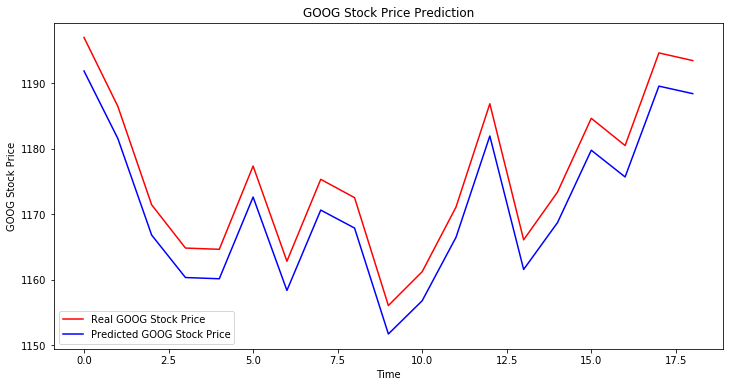

In [20]:
# Visualising the results
plt.figure(figsize=(12,6))
plt.plot(real_stock_price, color = 'red', label = 'Real GOOG Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted GOOG Stock Price')
plt.title('GOOG Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('GOOG Stock Price')
plt.legend()
plt.show()

In [13]:
# Part 4 - Evaluating the RNN

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [14]:
#  Evaluating the RNN
print ("Score")
print('MAE:  %.4F' % (mean_absolute_error(real_stock_price, predicted_stock_price)))
print('RMSE: %.4f  ' % (math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))))

Score
MAE:  4.7109
RMSE: 4.7162  


In [15]:
print('MSE:  %.4f' % (mean_squared_error(real_stock_price, predicted_stock_price)))

MSE:  22.2426


In [16]:
# Getting the real stock price of 2013 - 2018
real_stock_price_train = pd.read_csv('data/GOOG.csv')
real_stock_price_train = real_stock_price_train.iloc[:,5:6].values

In [17]:
real_stock_price_train = real_stock_price_train[:2496]

In [18]:
# Getting the predicted stock price of 2013 - 2018
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

In [19]:
print(predicted_stock_price_train.shape)

(2496, 1)


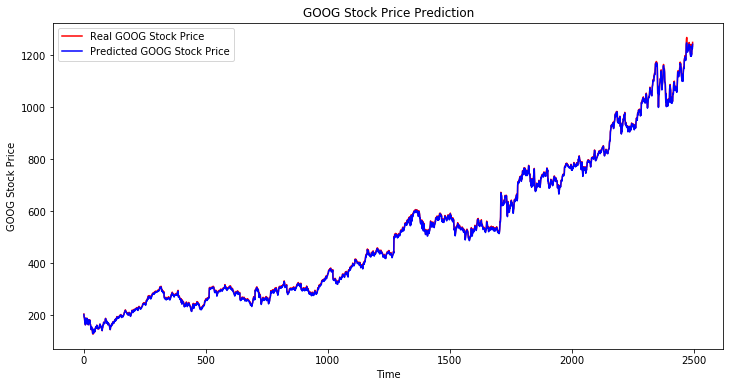

In [21]:
# Visualising the results
plt.figure(figsize=(12,6))
plt.plot(real_stock_price_train, color = 'red', label = 'Real GOOG Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted GOOG Stock Price')
plt.title('GOOG Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('GOOG Stock Price')
plt.legend()
plt.show()

In [22]:
#  Evaluating the RNN
print ("Score")
print('MAE:  %.4F' % (mean_absolute_error(real_stock_price_train, predicted_stock_price_train)))
print('RMSE: %.4f  ' % (math.sqrt(mean_squared_error(real_stock_price_train, predicted_stock_price_train))))

Score
MAE:  2.5267
RMSE: 2.6785  


In [23]:
print('MSE:  %.4f' % (mean_squared_error(real_stock_price_train, predicted_stock_price_train)))

MSE:  7.1742
